In [2]:
import pandas as pd

df = pd.read_csv("./IMDB-Dataset.csv")

STATISTIC LABEL IN DATASET

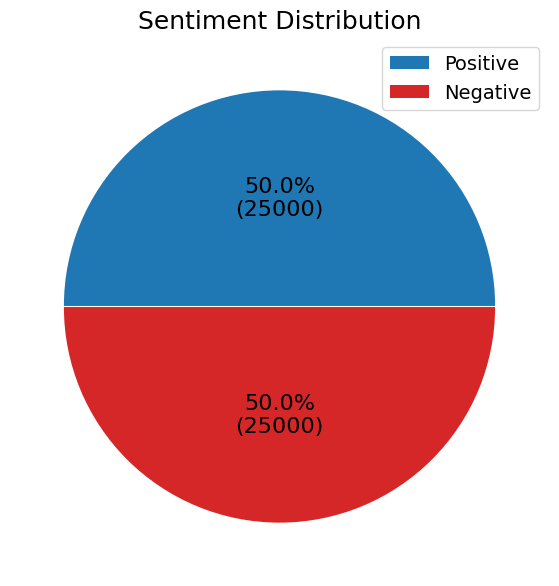

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df["sentiment"] == "positive"])
freq_neg = len(df[df["sentiment"] == "negative"])

data = [freq_pos, freq_neg]

labels = ["Positive", "Negative"]

plt.figure(figsize=(11, 7))
plt.pie(x=data, autopct=lambda pct: func(pct, data), explode=[0.0025]*2, 
        pctdistance=0.5, colors=[sns.color_palette()[0], "tab:red"], 
        textprops={"fontsize": 16})

plt.legend(labels, loc="best", prop={"size": 14})
plt.title("Sentiment Distribution", fontsize=18)
plt.savefig("PieChart.png")
plt.show()

STATISTIC LENGTH OF EACH SAMPLE CLASS

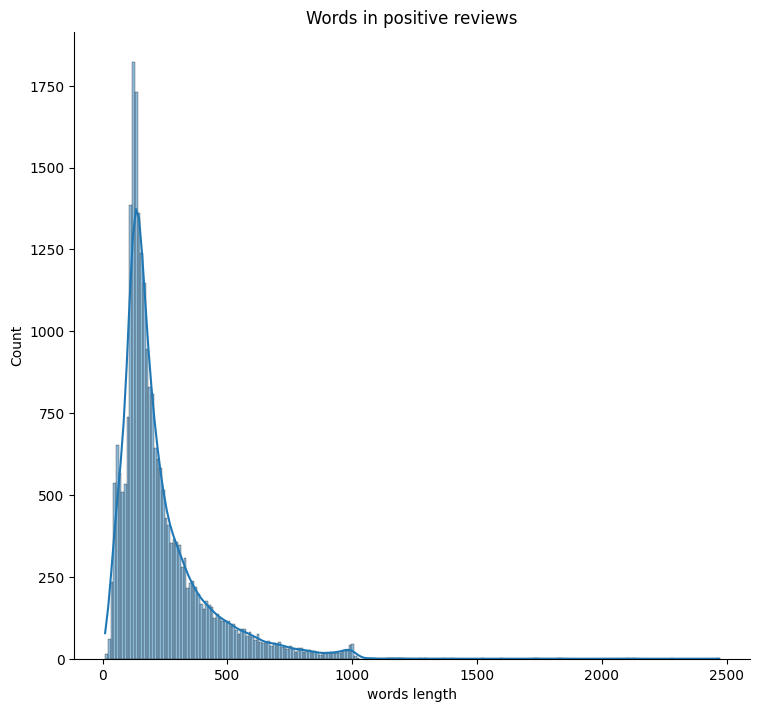

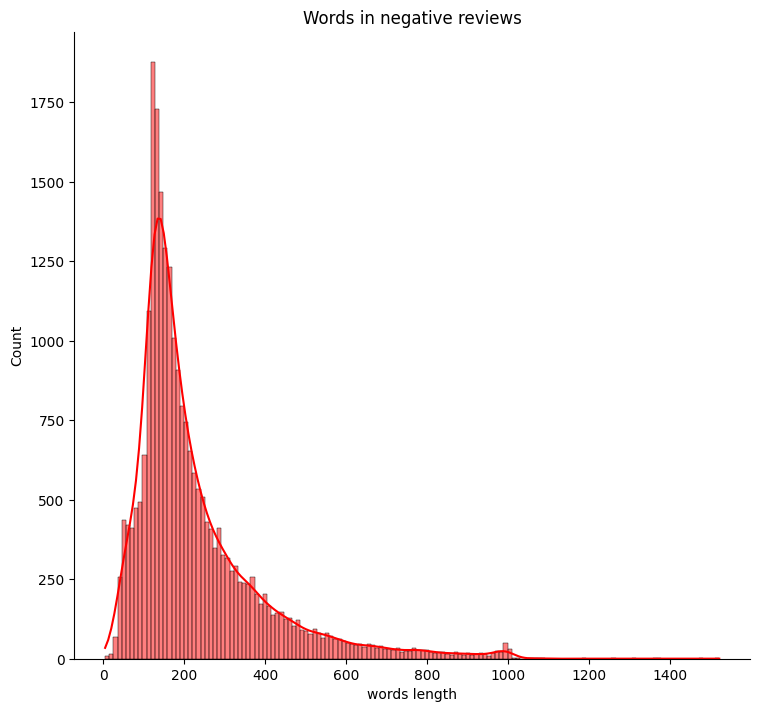

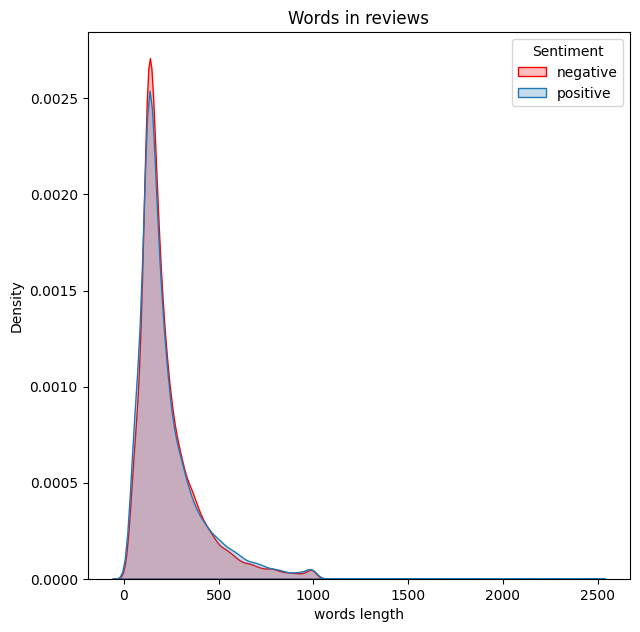

In [5]:
words_len = df["review"].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp["words length"] = words_len

hist_positive = sns.displot(
    data=df_temp[df_temp["sentiment"] == "positive"],
    x="words length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False
).set(title="Words in positive reviews")
plt.show(hist_positive)

hist_negative = sns.displot(
    data=df_temp[df_temp["sentiment"] == "negative"],
    x="words length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False, palette=["red"]
).set(title="Words in negative reviews")
plt.show(hist_negative)

plt.figure(figsize=(7,7.1))
kernel_distribution_number_words_plot = sns.kdeplot(
    data=df_temp, x="words length", hue="sentiment", fill=True, palette=[sns.color_palette()[0], "red"]
).set(title="Words in reviews")

plt.legend(title="Sentiment", labels=["negative", "positive"])
plt.show(kernel_distribution_number_words_plot)